In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
#part1_scatter()

In [150]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Your code here
    
    #the array to store prediction
    prediction = np.zeros((4, 100))
    
    for j, i in enumerate([1,3,6,9]):
        #To transform the original input data to add polynomial features 
        poly = PolynomialFeatures(degree=i)
        
        #Transform the input features in different scales to the same scale in order to apply ridge penalty
        X_poly = poly.fit_transform(X_train.reshape(-1,1))
        
        #generate test data
        test_data=np.linspace(0,10,100).reshape(-1,1)
        
        #transform test data as the same as training data
        test_data_transformed=poly.fit_transform(test_data)
        
        # Split the data into training/testing sets
        #X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_train, random_state=0)
        
        # Create linear regression object and Train the model using the training sets
        linPolyreg = LinearRegression().fit(X_poly, y_train)
        
        #To predict
        prediction[j,:]= linPolyreg.predict(test_data_transformed)

    
    return prediction

In [151]:
answer_one()


array([[  2.53040195e-01,   2.69201547e-01,   2.85362899e-01,
          3.01524251e-01,   3.17685603e-01,   3.33846955e-01,
          3.50008306e-01,   3.66169658e-01,   3.82331010e-01,
          3.98492362e-01,   4.14653714e-01,   4.30815066e-01,
          4.46976417e-01,   4.63137769e-01,   4.79299121e-01,
          4.95460473e-01,   5.11621825e-01,   5.27783177e-01,
          5.43944529e-01,   5.60105880e-01,   5.76267232e-01,
          5.92428584e-01,   6.08589936e-01,   6.24751288e-01,
          6.40912640e-01,   6.57073992e-01,   6.73235343e-01,
          6.89396695e-01,   7.05558047e-01,   7.21719399e-01,
          7.37880751e-01,   7.54042103e-01,   7.70203454e-01,
          7.86364806e-01,   8.02526158e-01,   8.18687510e-01,
          8.34848862e-01,   8.51010214e-01,   8.67171566e-01,
          8.83332917e-01,   8.99494269e-01,   9.15655621e-01,
          9.31816973e-01,   9.47978325e-01,   9.64139677e-01,
          9.80301028e-01,   9.96462380e-01,   1.01262373e+00,
        

In [32]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

#plot_one(answer_one())

In [141]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    # code here
    #result to return
    R2_score_train =np.zeros(10)
    R2_score_test =np.zeros(10)
    
    Poly_degrees = [0,1,2,3,4,5,6,7,8,9]
 
    for i in Poly_degrees:
        #To transform the original input data to add polynomial features 
        poly = PolynomialFeatures(degree=i)
        
        #Transform the input features in different scales to the same scale
        X_poly = poly.fit_transform(X_train.reshape(-1,1))
        

        
        #transform test data as the same as training data
        test_data_transformed=poly.fit_transform(X_test.reshape(-1,1))
        
        
        # Create linear regression object and Train the model using the training sets
        linPolyreg = LinearRegression().fit(X_poly, y_train)
        
        #To print model statistics
        #print("The poly degree is ", i,  ", and the linear model R-squared score(training) is, ", '{:.3f}'.format(linPolyreg.score(X_poly_train, y_poly_train)))
        #print("The poly degree is ", i,  ", and the linear model R-squared score(test) is, ", '{:.3f}'.format(linPolyreg.score(X_poly_test, y_poly_test)))
        
        # result:
        R2_score_train[i]= linPolyreg.score(X_poly, y_train)
        R2_score_test[i] = linPolyreg.score(test_data_transformed, y_test)
        
    return (R2_score_train,R2_score_test)

In [143]:
answer_two()

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
         0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247938, -0.64525379]))

In [156]:
def answer_three():
    
    # Your code here
    r2_train, r2_test = answer_two()

    degrees = np.arange(10)
    plt.figure()
    plt.plot(degrees, r2_train, 'b--', label='training data')
    plt.plot(degrees, r2_test, 'g-', label='test data')
    plt.legend()
    
    # show the difference between training R2 score and test R2 score
    #diff = []
    #for i in range(0,10):
    #    if r2_train[i] > r2_test[i]:
    #        diff.append("Overfitting") 
    #   else:
    #        if r2_train[i] < r2_test[i]:
    #            diff.append("Underfitting")
    #        else:
    #            diff.append("Good_Generalization")
        
    
    return (0,9,6)

<IPython.core.display.Javascript object>


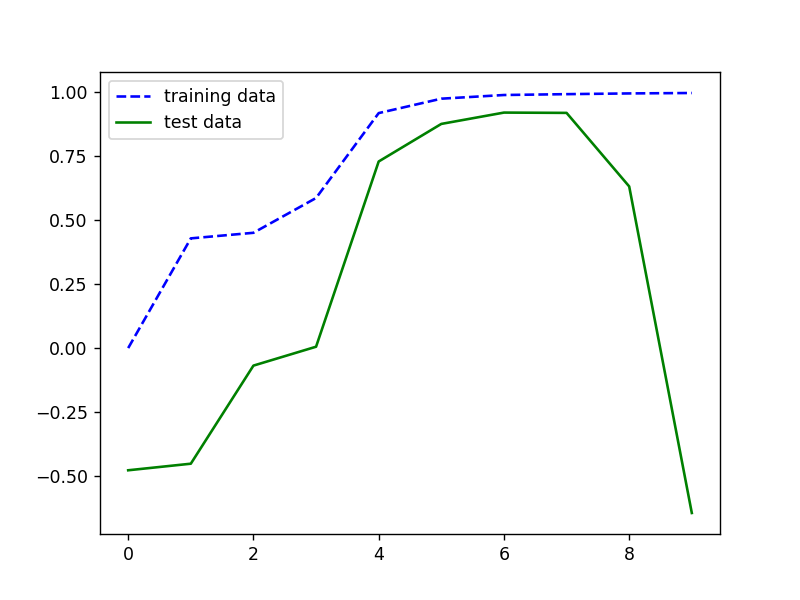

(0, 9, 6)

In [157]:
answer_three()

In [57]:
    %matplotlib notebook


In [103]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    #from sklearn.preprocessing import MinMaxScaler
    
    # Your code here
    
    poly = PolynomialFeatures(degree=12)
    
    #To transform polynomial features of degree 12 and scale the transformed data
    X_poly_train = poly.fit_transform(X_train.reshape(-1,1))
    #X_train_scaled = scaler.fit_transform(X_poly_train)
    
    X_poly_test = poly.fit_transform(X_test.reshape(-1,1))
    #X_test_scaled = scaler.transform(X_poly_test)
    
    # A non-regularized LinearRegression model (default parameters) 
    linreg = LinearRegression().fit(X_poly_train, y_train)
    LinearRegression_R2_test_score = linreg.score(X_poly_test, y_test)
    
    #A regularized Lasso Regression model (with parameters alpha=0.01, max_iter=10000) on polynomial features of degree 12
    #scaler = MinMaxScaler()
    

    
    # To run the Lasso regression model with parameters alpha=0.01, max_iter=10000
    linlasso = Lasso(alpha=0.01, max_iter = 10000, tol=0.1 ).fit(X_poly_train, y_train)
    Lasso_R2_test_score = linlasso.score(X_poly_test,y_test)
    
    return (LinearRegression_R2_test_score, Lasso_R2_test_score)

In [104]:
answer_four()

(-4.3119942256528674, 0.6051396919570029)

In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('C:\\Programming practice\mushroom.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

In [158]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    # Your code here
    features = []
    clf = DecisionTreeClassifier().fit(X_train2, y_train2)
    for feature, importance in zip(X_train2.columns,clf.feature_importances_):
        features.append((importance, feature))
    features.sort(reverse=True)    
    return [feature[1] for feature in features[:5]]

In [159]:
answer_five()

['odor_n',
 'stalk-root_c',
 'stalk-root_r',
 'spore-print-color_r',
 'spore-print-color_u']

In [116]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    # Your code here
    param_range = np.logspace(-4, 1, 6)
    clf = SVC(kernel = 'rbf', C=1).fit(X_subset, y_subset)
    train_scores, test_scores = validation_curve(clf, X_subset, y_subset, param_name='gamma',param_range=param_range, cv=3,scoring="accuracy")
    #print("train_scores is:", train_scores)
    #print("test_scores is:", test_scores)
    train_scores = train_scores.mean(axis=1)
    test_scores = test_scores.mean(axis=1)
    return (train_scores, test_scores)

In [117]:
answer_six()

(array([ 0.56918868,  0.9236818 ,  0.98818152,  1.        ,  1.        ,  1.        ]),
 array([ 0.5667051 ,  0.92073367,  0.98523621,  0.99852362,  0.99557304,
         0.51600199]))

In [160]:
def answer_seven():
    
    # Your code here
    accurancy_train, accurancy_test = answer_six()

    degrees = [0.0001,0.001,0.01,0.1,1,10]
    plt.figure()
    plt.plot(degrees, accurancy_train, 'b--', label='training data')
    plt.plot(degrees, accurancy_test, 'g-', label='test data')
    plt.legend()
    print(accurancy_train)
    print(accurancy_test)
    return (0,5,1)

<IPython.core.display.Javascript object>


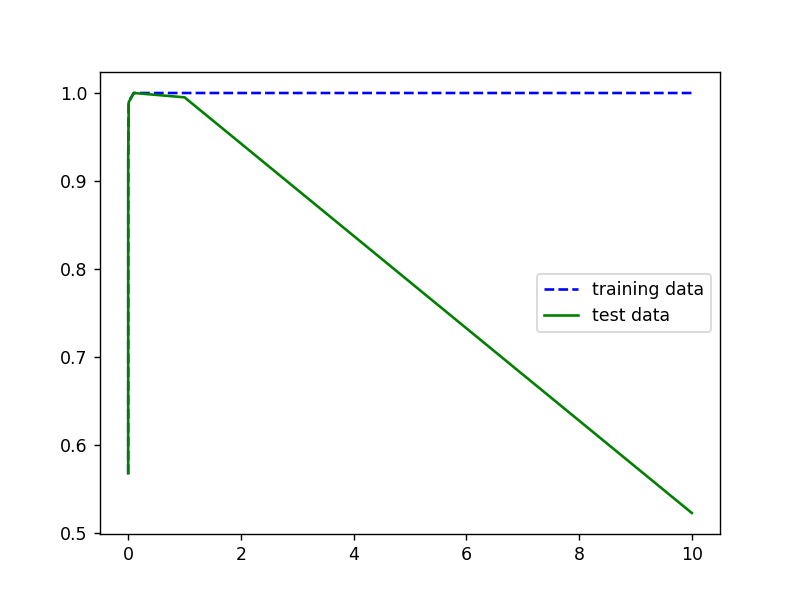

[ 0.56647847  0.93155951  0.99039881  1.          1.          1.        ]
[ 0.56768547  0.92959558  0.98965952  1.          0.99507994  0.52240279]


(0, 5, 1)

In [161]:
answer_seven()

In [118]:
degrees = np.logspace(-4, 1, 6)

In [119]:
degrees

array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00,   1.00000000e+01])

In [152]:
def answer_one1():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    result = np.zeros((4, 100))
    for i, degree in enumerate([1, 3, 6, 9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)
        y = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)))
        result[i, :] = y
    return result

In [153]:
answer_one1()

array([[  2.53040195e-01,   2.69201547e-01,   2.85362899e-01,
          3.01524251e-01,   3.17685603e-01,   3.33846955e-01,
          3.50008306e-01,   3.66169658e-01,   3.82331010e-01,
          3.98492362e-01,   4.14653714e-01,   4.30815066e-01,
          4.46976417e-01,   4.63137769e-01,   4.79299121e-01,
          4.95460473e-01,   5.11621825e-01,   5.27783177e-01,
          5.43944529e-01,   5.60105880e-01,   5.76267232e-01,
          5.92428584e-01,   6.08589936e-01,   6.24751288e-01,
          6.40912640e-01,   6.57073992e-01,   6.73235343e-01,
          6.89396695e-01,   7.05558047e-01,   7.21719399e-01,
          7.37880751e-01,   7.54042103e-01,   7.70203454e-01,
          7.86364806e-01,   8.02526158e-01,   8.18687510e-01,
          8.34848862e-01,   8.51010214e-01,   8.67171566e-01,
          8.83332917e-01,   8.99494269e-01,   9.15655621e-01,
          9.31816973e-01,   9.47978325e-01,   9.64139677e-01,
          9.80301028e-01,   9.96462380e-01,   1.01262373e+00,
        

In [154]:
def answer_two2():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    for degree in range(10):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)
        r2_train[degree] = linreg.score(X_poly, y_train)
        X_test_poly = poly.fit_transform(X_test.reshape(4,1))
        r2_test[degree] = linreg.score(X_test_poly, y_test)
    return (r2_train, r2_test)

In [155]:
answer_two2()

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
         0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247938, -0.64525379]))